# Heart Disease Development Statistical Analysis

# Problem Statement

In this fast moving world, one would almost forget to care about their health.

As per Centre for Disease Control in the USA,**1 death every 36 seconds due to heart disease.**
(Refer:https://www.cdc.gov/heartdisease/facts.htm#:~:text=Heart%20Disease%20in%20the%20United%20States&text=One%20person%20dies%20every%2036,1%20in%20every%204%20deaths)

It is very imperative to understand what lifestyle and health factors impact the development of the heart related problems. 

Hence, in this study we use **descriptive and Inferential statistical techniques** to find possible relations among the lifestyle parameters and their contribution to the health of the heart.

# Dataset Information:

#### The Framingham Heart Study is a long-term, ongoing cardiovascular cohort study of residents of the city of Framingham, Massachusetts The study began in 1948, and is now on its fourth generation of participants. 
#### For more details refer(https://en.wikipedia.org/wiki/Framingham_Heart_Study)

### Features Description:

1) Gender--0 = Female; 1 = Male

2) age-- Age of the people.

3) education-- 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college.

4) currentSmoker-- 0 = nonsmoker; 1 = smoker

5) cigsPerDay -- number of cigarettes smoked per day (estimated average)

6) BPMeds-- 0 = Not on Blood Pressure medications; 1 = Is on Blood Pressure medications

7) prevalentStroke--0=No history of Stroke;1=There is history of Stroke

8) prevalentHyp--0=No history of HyperTension;1=There is history of HyperTension

9) diabetes-- 0 = No; 1 = Yes

10) totChol-- Total Cholestrol in mg/dL

11) sysBP -- Systolic Blood Pressure in mmHg

12) diaBP-- Diastolic mmHg

13) BMI--  calculated as: Weight (kg) / Height(meter-squared)

14) heartRate-- Heart beats/Min (Ventricular)

15) glucose-- Sugar level in mg/dL

16)  Develop_Heart_Disease_in10yrs(Target Variable)

### Import the required librairies

In [29]:
# import 'pandas' -------------------------------------------------------------------------
import pandas as pd 
# import 'numpy' --------------------------------------------------------------------------
import numpy as np
# import subpackage of matplotlib----------------------------------------------------------
import matplotlib.pyplot as plt
# import 'seaborn'--------------------------------------------------------------------------
import seaborn as sns
# to suppress warnings ---------------------------------------------------------------------
from warnings import filterwarnings
filterwarnings('ignore')
# import 'random' to generate random sample-------------------------------------------------
import random
# import statistics to perform statistical computation--------------------------------------  
import statistics
# import 'stats' package from scipy library-------------------------------------------------
from scipy import stats as stats
# import a library to perform Z-test--------------------------------------------------------
from statsmodels.stats import weightstats as stests
# to test the normality --------------------------------------------------------------------
from scipy.stats import shapiro
# import the function to calculate the power of test----------------------------------------
from statsmodels.stats import power
# import pairwise_tukeyhsd to perform post-hoc test and also import scikit_posthocs---------
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs
# import anova libraries---------------------------------------------------------------------
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# import chi-square libraries-----------------------------------------------------------------
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

In [2]:
df=pd.read_csv('framingham.csv')
df.head()

,Gender,age,age_category,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Develop_Heart_Disease_in10yrs
0,Female,39,<40,College,Non-Smoker,0,No,No,No,No,195,106.0,70.0,26.97,80,77,No
1,Male,46,<50,Graduate Equivalency Degree,Non-Smoker,0,No,No,No,No,250,121.0,81.0,28.73,95,76,No
2,Female,48,<50,High School,Smoker,20,No,No,No,No,245,127.5,80.0,25.34,75,70,No
3,Male,61,<=70,Vocational School,Smoker,30,No,No,Yes,No,225,150.0,95.0,28.58,65,103,Yes
4,Male,46,<50,Vocational School,Smoker,23,No,No,No,No,285,130.0,84.0,23.10,85,85,No


# Descriptive Statistics

In [3]:
df.shape

(3658, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gender                         3658 non-null   object 
 1   age                            3658 non-null   int64  
 2   age_category                   3658 non-null   object 
 3   education                      3658 non-null   object 
 4   currentSmoker                  3658 non-null   object 
 5   cigsPerDay                     3658 non-null   int64  
 6   BPMeds                         3658 non-null   object 
 7   prevalentStroke                3658 non-null   object 
 8   prevalentHyp                   3658 non-null   object 
 9   diabetes                       3658 non-null   object 
 10  totChol                        3658 non-null   int64  
 11  sysBP                          3658 non-null   float64
 12  diaBP                          3658 non-null   f

<b>Categorical columns : </b>Gender,age_category,education,currentSmoker,Bpmeds,prevalentStroke,prevalentHyp,diabetes,Develop_Heart_Disease_in10yrs

<b> Numerical columns:</b> age,cigsPerDay,totCol,sysBP,diaBP,BMI,heartRate,glucose

In [5]:
df.describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,49.551941,9.025424,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925
std,8.562029,11.921590,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164
min,32.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000
75%,56.000000,20.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000
max,70.000000,70.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000


#### Inference: The count and mean for each numerical column ,With the highest value  in std  for totChol shows how far the data is from mean, it shows the spread of the data,the 25%, 50% and 70% values for all the numeric variables with their minimum and maximum values is shown in the above output.

In [6]:
df_catg=df.select_dtypes(include='object')
df_catg.head()

,Gender,age_category,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,Develop_Heart_Disease_in10yrs
0,Female,<40,College,Non-Smoker,No,No,No,No,No
1,Male,<50,Graduate Equivalency Degree,Non-Smoker,No,No,No,No,No
2,Female,<50,High School,Smoker,No,No,No,No,No
3,Male,<=70,Vocational School,Smoker,No,No,Yes,No,Yes
4,Male,<50,Vocational School,Smoker,No,No,No,No,No


In [7]:
df_num=df.select_dtypes(include=['int64','float64'])
df_num.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39,0,195,106.0,70.0,26.97,80,77
1,46,0,250,121.0,81.0,28.73,95,76
2,48,20,245,127.5,80.0,25.34,75,70
3,61,30,225,150.0,95.0,28.58,65,103
4,46,23,285,130.0,84.0,23.10,85,85


#### Let us now see how the numerical features are related

In [9]:
corelation=df.corr()
corelation

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
age,1.000000,-0.189295,0.268252,0.388267,0.208283,0.137511,-0.002722,0.118349
cigsPerDay,-0.189295,1.000000,-0.030400,-0.094781,-0.056746,-0.087395,0.064030,-0.053726
totChol,0.268252,-0.030400,1.000000,0.219925,0.174422,0.121056,0.093053,0.049884
sysBP,0.388267,-0.094781,0.219925,1.000000,0.786669,0.330917,0.184797,0.134651
diaBP,0.208283,-0.056746,0.174422,0.786669,1.000000,0.385348,0.178744,0.063540
BMI,0.137511,-0.087395,0.121056,0.330917,0.385348,1.000000,0.074131,0.083683
heartRate,-0.002722,0.064030,0.093053,0.184797,0.178744,0.074131,1.000000,0.097074
glucose,0.118349,-0.053726,0.049884,0.134651,0.063540,0.083683,0.097074,1.000000


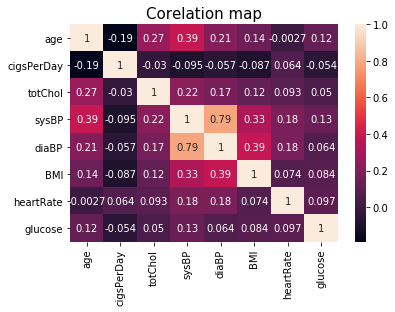

In [10]:
sns.heatmap(corelation,annot=True)
plt.title('Corelation map',color = 'black',fontsize = 15)
plt.show()

#### Inference:

#### There is a strong positive corelation between systolic Blood Pressure and diastolic Blood Pressure


#### There is a  weak Positive corelation between Age and BP,cholestrol


#### There is a negative corelation between age and cigarettes per day

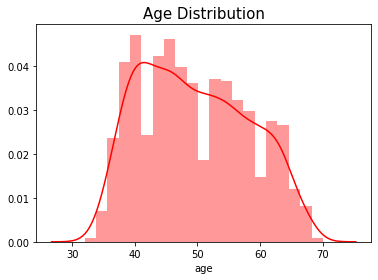

In [24]:
sns.distplot(df.age,color='r')
plt.title('Age Distribution',color = 'black',fontsize = 15)
plt.show()

#### Inference: Most of the people are belong to age group 40 to 60 

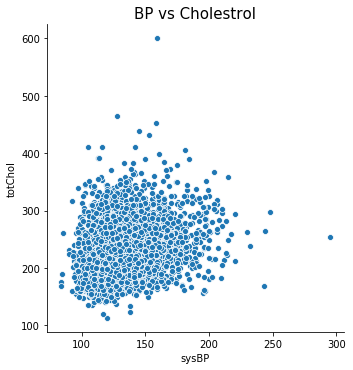

In [36]:
sns.relplot(x='sysBP',y='totChol',data=df)
plt.title('BP vs Cholestrol',color = 'black',fontsize = 15)
plt.show()

#### Inference:Most of the observations have Cholestrol level in the range 150-350 mg/dL and sysBP in the range 80-180 mmHg

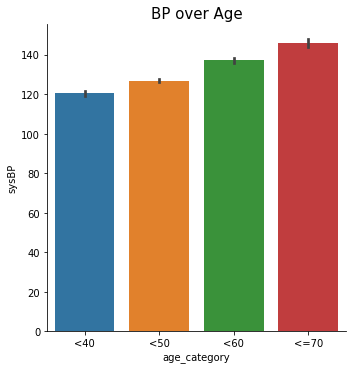

In [30]:
sns.catplot(x='age_category',y='sysBP',data=df,kind='bar',order=['<40','<50','<60','<=70'])
plt.title('BP over Age',color = 'black',fontsize = 15)
plt.show()

#### Inference: There is a increase in BP as the person gets older

In [23]:
# The average age of males and females in the data
avg_age=df.groupby('Gender').age.mean()
print('The average age of males and females in the data are :\n ',avg_age)

The average age of males and females in the data are :
  Gender
Female    49.317930
Male      49.738575
Name: age, dtype: float64


In [24]:
#The qualification of most of the individuals
print('The qualification of most of the individuals is ',df['education'].mode())

The qualification of most of the individuals is  0    High School
dtype: object


In [25]:
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 32
Max Age : 70
Mean Age : 49.55194095133953


In [27]:
young_ages=df[(df.age>=29)&(df.age<40)]
middle_ages=df[(df.age>=40)&(df.age<55)]
elderly_ages=df[(df.age>55)]
print('Young Aged :',len(young_ages))
print('Middle Aged :',len(middle_ages))
print('Elderly Aged :',len(elderly_ages))

Young Aged : 481
Middle Aged : 2048
Elderly Aged : 1006


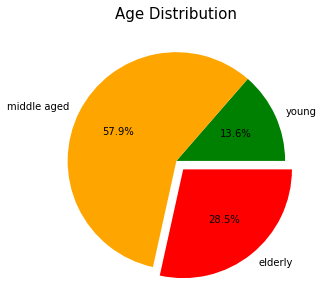

In [28]:
colors = ['green','orange','red']
explode = [0,0,0.1]
plt.figure(figsize = (5,5))

plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['young','middle aged','elderly'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.title('Age Distribution',color = 'black',fontsize = 15)
plt.show()

#### Inference: Most of the people are middle aged i.e between 40 and 55 which constitutes 57.9% of the data.

# Numerical columns 

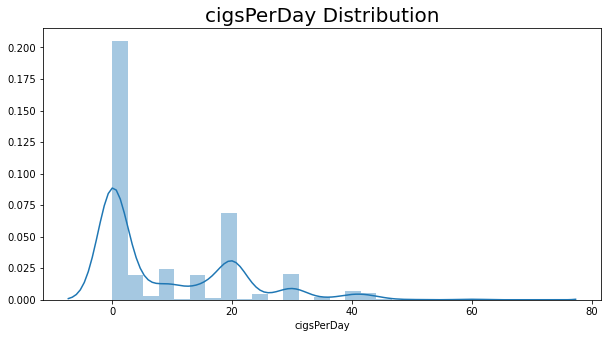

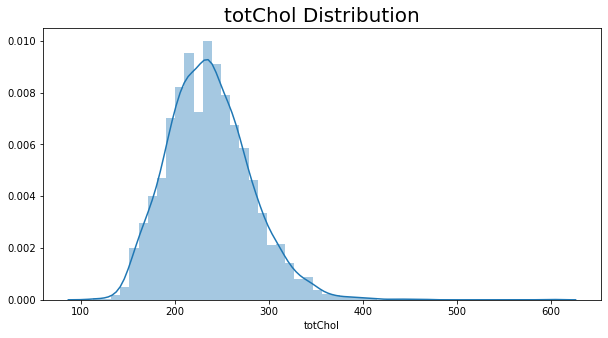

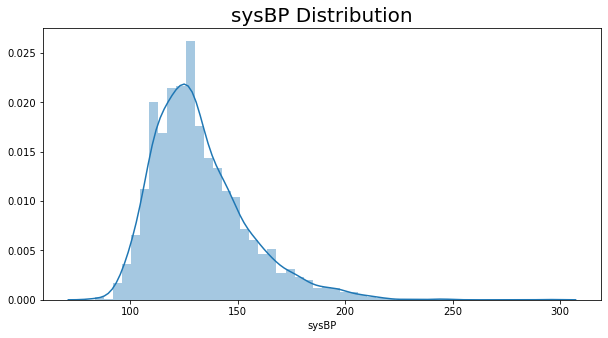

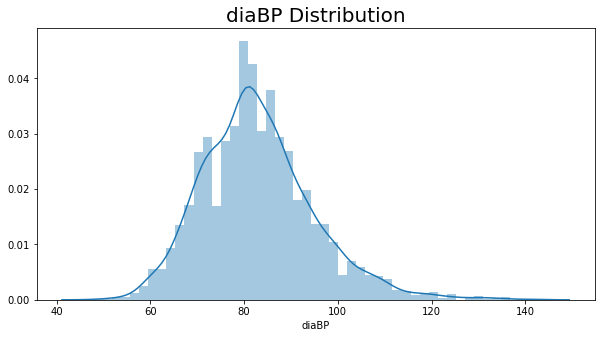

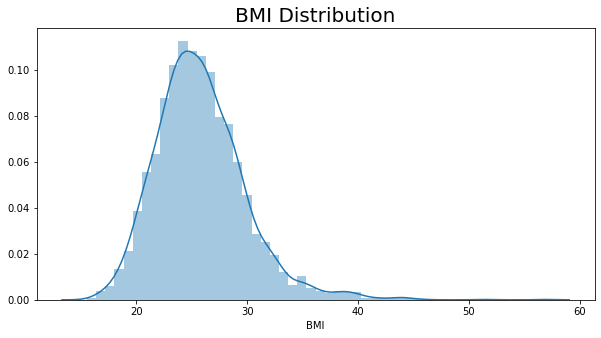

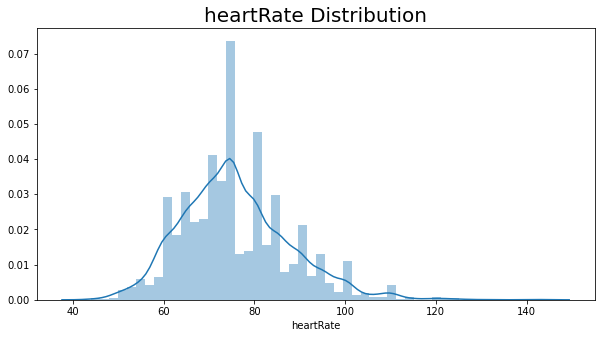

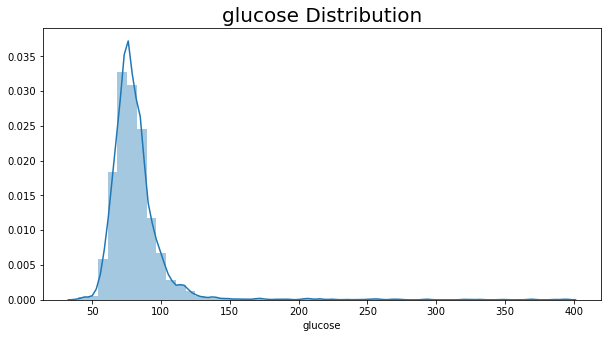

In [56]:
numeric_var = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for feature in numeric_var:
    plt.figure(figsize=(10, 5), facecolor='w')
    sns.distplot(df[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

# Distribution of cigsPerDay,age,currentSmoker

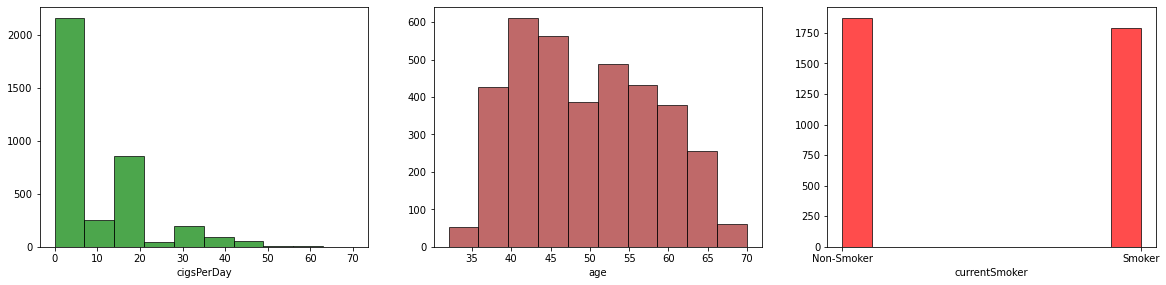

In [31]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.cigsPerDay, color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('cigsPerDay')

plt.subplot(3,3,2)
plt.hist(df.age, color='brown', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.currentSmoker, color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('currentSmoker')

plt.show()

#### Inference: cigsPerDay is right skewed, age is uniformly distributed, non smoker has more count.

In [32]:
df.currentSmoker.value_counts()

Non-Smoker    1869
Smoker        1789
Name: currentSmoker, dtype: int64

#### Inference: Non-Smoker's has the highest counts.

# Checking for Outliers

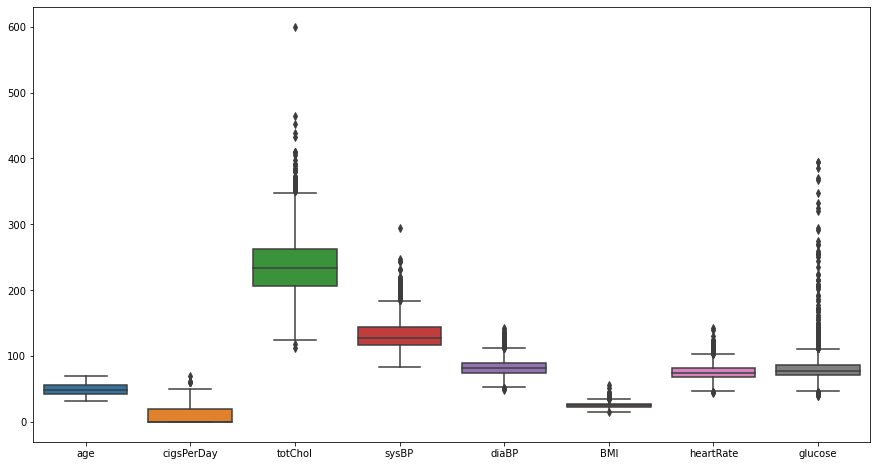

In [54]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.show()

#### Inference: Except for age feature, outliers are present in all the other features.

# Skewness

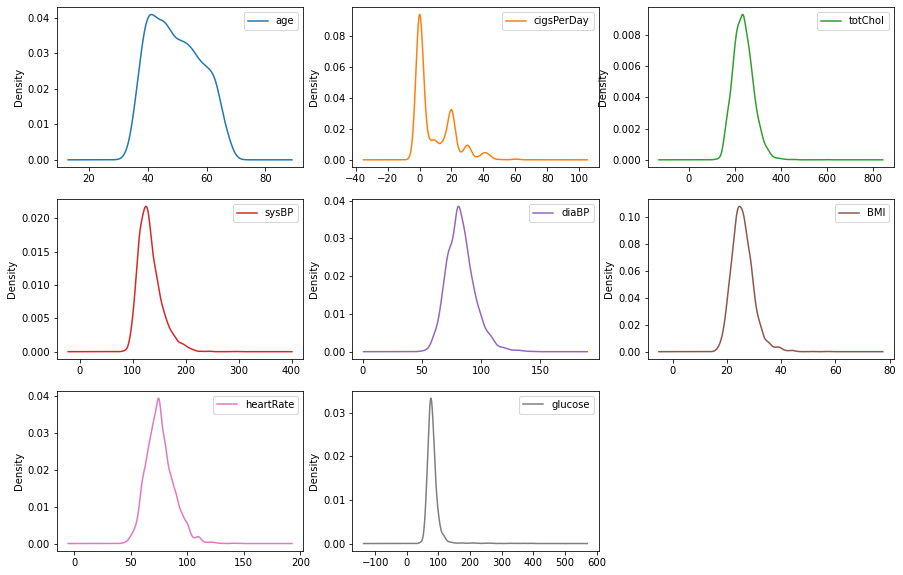

In [34]:
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

In [35]:
skew = df.skew()
# print the skewness
print(skew)

age           0.232006
cigsPerDay    1.228866
totChol       0.664334
sysBP         1.163611
diaBP         0.709407
BMI           0.999606
heartRate     0.670839
glucose       6.281911
dtype: float64


#### Inference: The graph shows that the data is right skewed.
#### The above value represents that the variable glucose is highly positively skewed and the rest of the variables are positively skewed as well

# Range

In [36]:
# filter the numeric variables from the data
df_num = df.select_dtypes(include = np.number)
# find the range
print(df_num.max()-df_num.min())

age            38.00
cigsPerDay     70.00
totChol       487.00
sysBP         211.50
diaBP          94.50
BMI            41.26
heartRate      99.00
glucose       354.00
dtype: float64


#### Inference: All the numeric variables are positevely skewed.

# Kurtosis

In [41]:
# use kurt() to calculate the kurtosis
kurt=df.kurt()
kurt

age           -0.991908
cigsPerDay     0.957404
totChol        1.841319
sysBP          2.278611
diaBP          1.259668
BMI            2.835462
heartRate      1.062393
glucose       60.129061
dtype: float64

#### Inference:
#### The variables age is Platykurtic.
#### cigsPerDay,totChol,sysBP,diaBP,BMI,glucose are leptokurtic since greater than zero

# Quartiles

In [43]:
# the first quartile
Q1=df.quantile(0.25)
Q1

age            42.00
cigsPerDay      0.00
totChol       206.00
sysBP         117.00
diaBP          75.00
BMI            23.08
heartRate      68.00
glucose        71.00
Name: 0.25, dtype: float64

In [44]:
Q2=df.quantile(0.5)#MEDIAN
Q2

age            49.00
cigsPerDay      0.00
totChol       234.00
sysBP         128.00
diaBP          82.00
BMI            25.38
heartRate      75.00
glucose        78.00
Name: 0.5, dtype: float64

In [45]:
# the third quartile
Q3=df.quantile(0.75)
Q3

age            56.0000
cigsPerDay     20.0000
totChol       263.0000
sysBP         143.8750
diaBP          90.0000
BMI            28.0375
heartRate      82.0000
glucose        87.0000
Name: 0.75, dtype: float64

# IQR

In [46]:
IQR=Q3-Q1
IQR

age           14.0000
cigsPerDay    20.0000
totChol       57.0000
sysBP         26.8750
diaBP         15.0000
BMI            4.9575
heartRate     14.0000
glucose       16.0000
dtype: float64

# Variance

In [47]:
# calculate the variance
var = df.var()
# rounding off the values upto 3 decimals
round(var, 3)

age             73.308
cigsPerDay     142.124
totChol       1944.605
sysBP          487.830
diaBP          143.383
BMI             16.529
heartRate      143.557
glucose        571.409
dtype: float64

#### Inference:
#### The variance looks at how spread out the observations are from the mean.
#### The higher the variance more the data is spread out. The output suggests that the variable BMI has the least variance and the variable totChol has the maximum variance which means the data is spread out away from the mean.


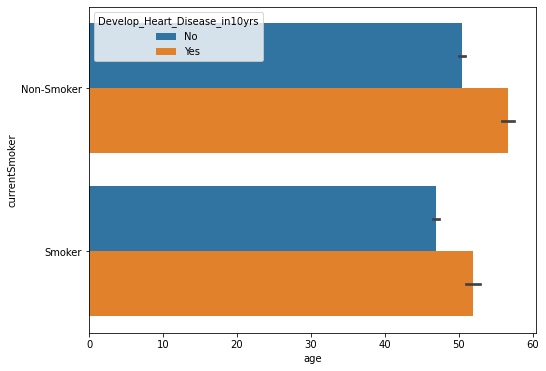

In [53]:
plt.figure(figsize=(8,6))
sns.barplot(df.age, df.currentSmoker,hue=df.Develop_Heart_Disease_in10yrs )
plt.show()

#### Inference:  As per the dataset, Non smokers have a higher risk of developing heart disease in the 10 years as compared to smokers. This inference may not go well with the real-time medical science as it is proven that Smokers are the people to be developing heart sidease.

### The increase in age and cholestrol level develops a heart disease in 10 years?

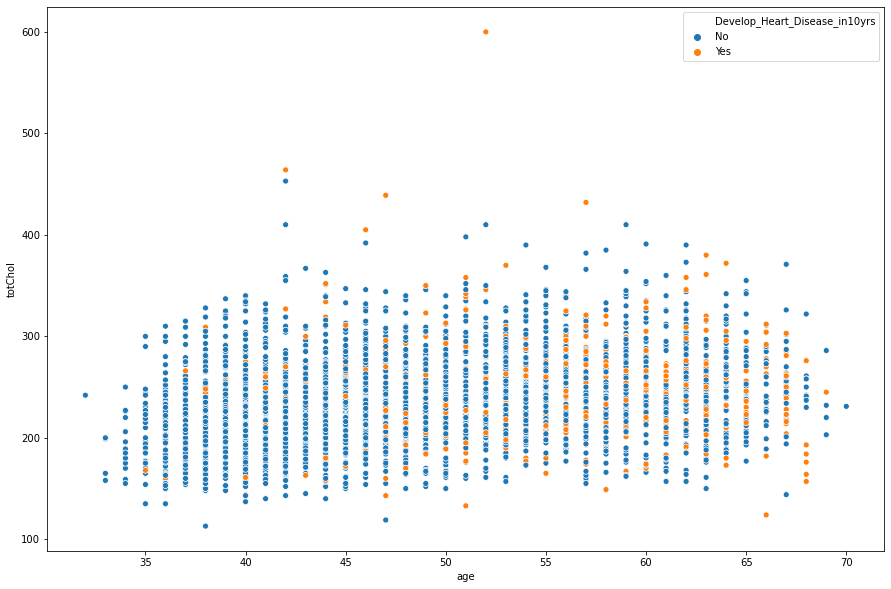

In [51]:
sns.scatterplot(x = 'age',y = 'totChol',data = df,hue = 'Develop_Heart_Disease_in10yrs')

#### Inference: As the age increases beyond 55 and with the total cholestrol above 200 developing  a heart disease in 10 years is more.

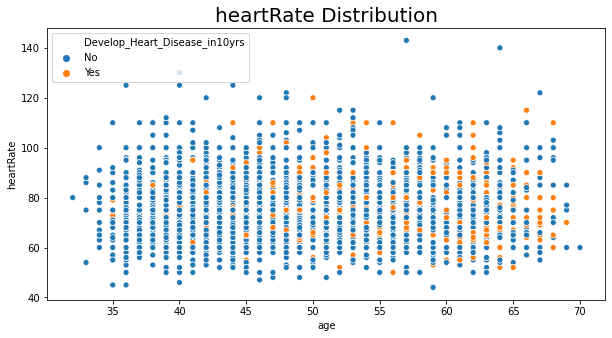

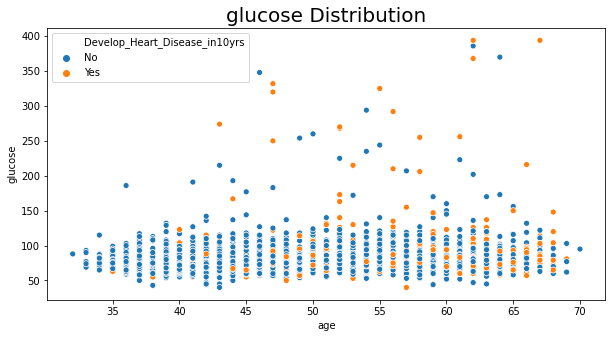

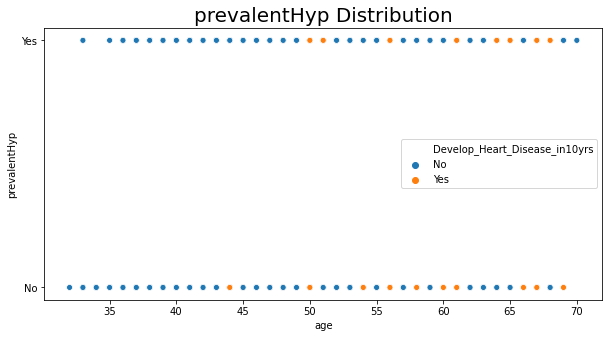

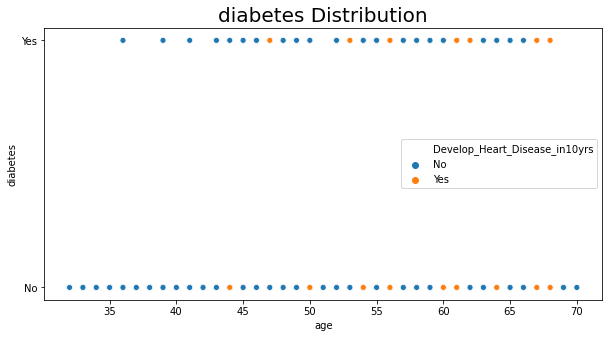

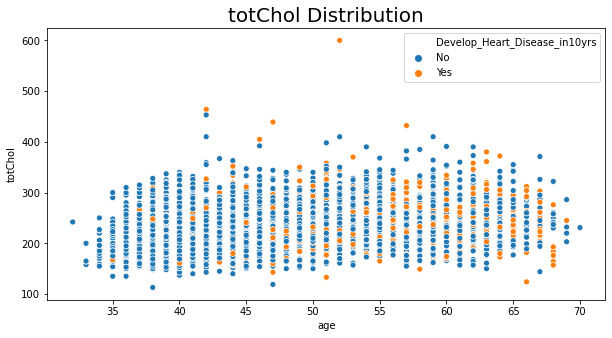

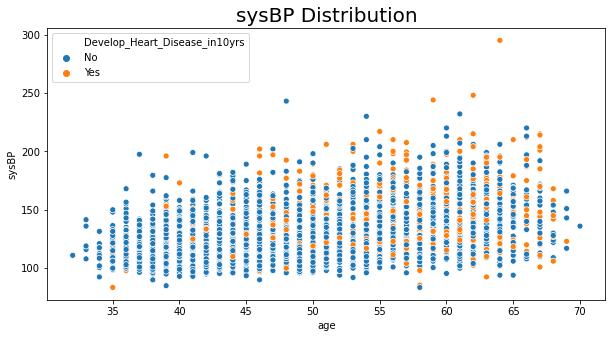

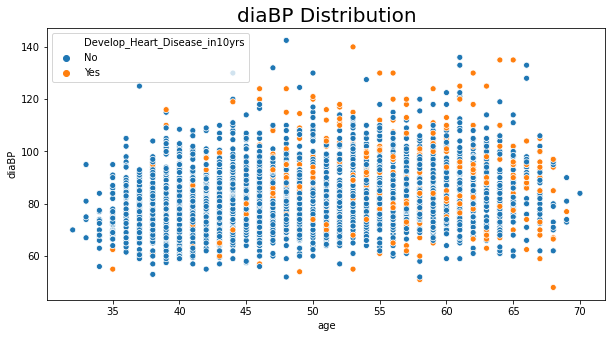

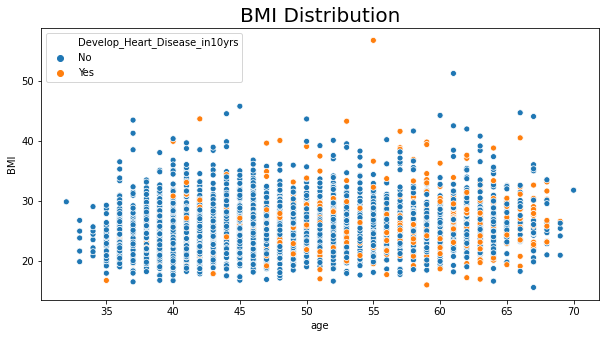

In [52]:
df_var = ['heartRate','glucose','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI']
for feature in df_var:
    plt.figure(figsize=(10,5), facecolor='w')
    sns.scatterplot(df.age,df[feature],hue=df.Develop_Heart_Disease_in10yrs )
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

#### Inference: As observed in the above graph we can infer that the risk of developing heart disease increases with age

# Inferential Analysis

### 1) The health magazine in Bangalore states that an avg. normal fasting glucose level should be greater than 80 mg/dL. To test this claim, a survey is done which collects the data of 3658 people as a sample study. Test the claim with 90% confidence interval for the population avg. glucose level.

**H0: μ_glucose_level <= 80 mg/dL** # State Null Hypothesis

**H1: μ_glucose_level > 80 mg/dL** # State Alternate Hypothesis

In [33]:
def t_test(pop_mean, sample_std, n, sample_mean):
    t_stat = (sample_mean - pop_mean) / (sample_std / np.sqrt(n))

    # return the t-test value
    return t_stat

alpha=0.1
n = 3658
dfn=n-1
tcrit=stats.t.isf(q=alpha,df=n-1)
print('critical value:',tcrit)

pop_mean = 80
sample_std = df.glucose.std()
sample_mean =  df.glucose.mean()

t_stat = t_test(pop_mean, sample_std, n, sample_mean)
p_value=stats.t.sf(t_stat,dfn)
print("t-stat:", t_stat)
print("p-value:", p_value)

critical value: 1.281783105302724
t-stat: 4.688200307212396
p-value: 1.4283763733235904e-06


#### Inference: We can see that the test statistic 4.6 is less than t critical value 1.28  and p-value < alpha(0.10) for n=3658. Thus, we reject the null hypothesis and conclude that normal glucose level has to be greater than 80 mg/dL.

In [ ]:
#Using Z test

In [23]:
alpha=0.1
n = 3658
pop_mean = 80
sample_std = df.glucose.std()
sample_mean =  df.glucose.mean()

z_test=(sample_mean - pop_mean) / (sample_std / np.sqrt(n))
z_crit=stats.norm.isf(q=alpha)
print('critical value:',z_crit)
print("Z-stat:", z_test)
p_value=stats.norm.sf(z_test)
print("p-value:", p_value)

critical value: 1.2815515655446004
Z-stat: 4.688200307212396
p-value: 1.3780908721177362e-06


#### Inference: Since the very greater than 30. The Z-Stat and the Z-Critical values will become equal. This is eveident in the above results.

## Plotting Acception and Rejection Regions

In [77]:

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click to see the plot."></form>''')

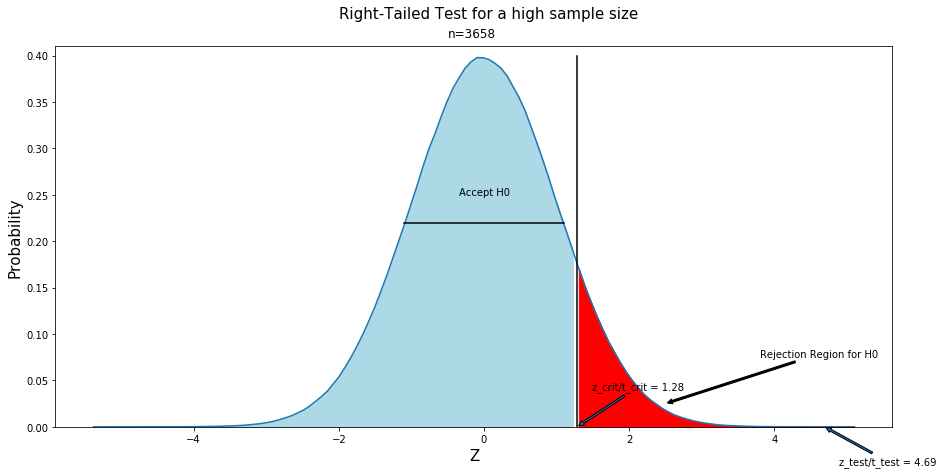

In [28]:
plt.subplots(figsize=(15,7))
X = stats.norm.rvs(size = 2000000,random_state = 20)
ax = sns.distplot(a = X, hist = False)
plt.ylim(0, 0.41)
z_crit = np.abs(stats.norm.isf(alpha))
plt.plot([z_crit,z_crit], [0,0.4], color = 'black')
plt.annotate(s="Accept H0",xy=(0,0.25),xytext=(-0.35,0.25))
plt.plot([-1.1,1.1], [0.22,0.22], color = 'black')
plt.annotate(s = 'z_crit/t_crit = '+ str(round(z_crit,2)), xy = (z_crit, 0), xytext = (z_crit+0.2, 0.04),arrowprops = dict(arrowstyle = 'simple'))
plt.annotate(s = 'Rejection Region for H0', xy = (2.5, 0.025), xytext = (3.8, 0.075),arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))
plt.annotate(s = 'z_test/t_test = '+ str(round(z_test,2)), xy = (z_test, 0), xytext = (z_test+0.2, -0.04),arrowprops = dict(arrowstyle = 'simple'))
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax.fill_between(x1[x1 <= z_crit], y1[x1 <= z_crit], color = 'lightblue')
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax.fill_between(x1[x1 >= z_crit], y1[x1 >= z_crit], color = 'red')
plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
#plt.title('Left-Tailed Test for a high sample size', fontsize = 15)
plt.text(x=-0.5,y=0.42,s='n=3658', fontsize = 12)
plt.text(x=-2,y=0.44,s='Right-Tailed Test for a high sample size', fontsize = 15)
plt.show()


### 2) Cholestrol for male and female are recorded. Perform a test to test whether cholestrol is different for both the categories of people. Use level of significance as 0.05

alpha = 0.05

Let Cx be the cholestrol level for Male and Cy be the cholestrol level for Female.

The null and alternative hypothesis is:

**H0: Cx = Cy** 

**H1: Cx != Cy**

In [403]:
df_n=df[df['Gender']== 'Male']
df_y=df[df['Gender']== 'Female']
df_nt=df_n['totChol']
df_yt=df_y['totChol']

In [404]:
stat, p_value = shapiro(df_nt)

print('P-Value:', p_value)

P-Value: 2.6677658361437587e-18


In [405]:
stat, p_value = shapiro(df_yt)

print('P-Value:', p_value)

P-Value: 2.580395749504638e-12


From the above result, we can see that the p-value is less than 0.05 for both male and female, thus we can say that the cholestrol level for people having historic stroke is **not normally distributed. Hence, we go for "Mann Whitney U test" non-parametric test**.

In [406]:
test_stat, p_value = stats.mannwhitneyu(df_nt,df_yt, alternative = 'two-sided')

print('Test statistic:', test_stat)
print('p-value:', p_value)

Test statistic: 1771756.0
p-value: 0.0001490576358408318


As the p-value is lesser than 0.05. Thus we reject the null hypothesis.

**Also we conclude that the amount of cholestrol level is not same for both Male and Female**.

### 3) Check whether we can use the given dataset to study the equality of average BMI with different age categories.Test at a 5% level of significance.(1 way ANOVA)

#### Take 95% of confidence

The null and alternative hypothesis is:

**H0: The average BMI is equal in all the age categories**

**H1: The average BMI is not equal in all the age categories**

In [11]:
df.groupby('age_category').describe()

age                                                     \
               count       mean       std   min   25%   50%   75%   max   
age_category                                                              
<40            481.0  37.432432  1.487485  32.0  36.0  38.0  39.0  39.0   
<50           1438.0  44.297636  2.858847  40.0  42.0  44.0  47.0  49.0   
<60           1143.0  54.271216  2.836762  50.0  52.0  54.0  57.0  59.0   
<=70           596.0  62.959732  2.298349  60.0  61.0  63.0  64.0  70.0   

             cigsPerDay             ... heartRate        glucose             \
                  count       mean  ...       75%    max   count       mean   
age_category                        ...                                       
<40               481.0  10.723493  ...      82.0  125.0   481.0  78.484407   
<50              1438.0  11.042420  ...      83.0  130.0  1438.0  79.761474   
<60              1143.0   7.867892  ...      82.0  143.0  1143.0  83.504812   
<=70              596.0   5.008389  ...      82.0  140.0   596.0  86.449664   

                                                        
                    std   min   25%   50%   75%    max  
age_category                                            
<40           12.811139  43.0  70.0  77.0  84.0  186.0  
<50           20.266924  40.0  70.0  77.0  85.0  348.0  
<60           24.890860  40.0  72.0  78.0  88.0  325.0  
<=70          33.945718  45.0  73.0  81.0  91.0  394.0  

[4 rows x 64 columns]

In [12]:
bm_40= df[df['age_category']== '<40']['BMI']
shapiro(bm_40)

ShapiroResult(statistic=0.9650236368179321, pvalue=2.7403697089312118e-09)

we can see that the **p-value is less than 0.05**, thus we can say that the BMI for people having age category less than 40 is **not normally distributed**.

In [13]:
bm_50= df[df['age_category']== '<50']['BMI']
shapiro(bm_50)

ShapiroResult(statistic=0.9654681086540222, pvalue=5.0693606675995916e-18)

we can see that the **p-value is less than 0.05**, thus we can say that the BMI for people having age category less than 50 is **not normally distributed**.

In [14]:
bm_60= df[df['age_category']== '<60']['BMI']
shapiro(bm_60)

ShapiroResult(statistic=0.9439626932144165, pvalue=2.1625829321631962e-20)

we can see that the **p-value is less than 0.05**, thus we can say that the BMI for people having age category less than 60 is **not normally distributed**.

In [15]:
bm_70= df[df['age_category']== '<=70']['BMI']
shapiro(bm_70)

ShapiroResult(statistic=0.9451059103012085, pvalue=4.719496142632437e-14)

we can see that the **p-value is less than 0.05**, thus we can say that the BMI for people having age category less than equal to 70 is **not normally distributed**.

From the above result, we can see that the p-value is less than 0.05, thus we can say that the BMI in all age categories is **not normally distributed.**

In [16]:
stat, p_value = stats.levene(bm_40,bm_50,bm_60,bm_70)

print('P-Value:', p_value)

P-Value: 0.09535056841695358


#### From the above result, we can see that the p-value is greater than 0.05, thus we can say that the population variances are equal for all the samples. Since normality is not passing, we can not apply one-way ANOVA to test the equality of BMI in different age categories. 

#### Hence, we go for  non-parametric equivalent Kruskal-Wallis H test.

In [38]:
# non-parametric equivalent Kruskal-Wallis H test

alpha=0.05
# df=4-1=3
dfn=3
# critical value
chi2_cv = np.abs(round(stats.chi2.isf(q = 0.05, df = 3), 4))

print('Critical value for chi-square test:', chi2_cv)

Critical value for chi-square test: 7.8147


In [18]:
test_stat, p_value = stats.kruskal(bm_40,bm_50,bm_60,bm_70)
print('Test statistic:', test_stat)
print('p-value:', p_value)

Test statistic: 77.93411765745086
p-value: 8.513229426074711e-17


From the above output we can see that the test statistic is greater than critical value(7.8147), the p-value is less than 0.05.Thus we **reject the null hypothesis.**

In [19]:
# scikit_posthocs.posthoc_conover(a = df, val_col = 'BMI', group_col = 'age_category')
scikit_posthocs.posthoc_conover(a = df, val_col = 'BMI', group_col = 'age_category')

,<40,<50,<60,<=70
<40,1.000000e+00,6.271659e-03,5.479420e-12,2.192129e-11
<50,6.271659e-03,1.000000e+00,5.357565e-09,4.293576e-08
<60,5.479420e-12,5.357565e-09,1.000000e+00,4.805517e-01
<=70,2.192129e-11,4.293576e-08,4.805517e-01,1.000000e+00


#### Inference: All age category pairs except the same pairs have p-value<alpha hence it not possible to say the age categories with equal BMI.

 ## 4) Is the proportion of age categories differ with people with  diabetes/smoking   habits/prevalentStroke/BPMeds/prevalentHyp? (Test of associaton)

In [357]:
import pandas as pd
df=pd.read_csv("framingham.csv")

#### 4.1 Proportion of age_category and diabetes

The null and alternative hypothesis is:

**1) H0: age_category and diabetes status are independent**

**2) H1: age_category and diabetes status are not independent**

In [302]:
df.age_category.value_counts()

<50     1438
<60     1143
<=70     596
<40      481
Name: age_category, dtype: int64

In [303]:
df.diabetes.value_counts()

No     3559
Yes      99
Name: diabetes, dtype: int64

In [330]:
print("Proportion of age_category and diabetes")
table = pd.crosstab(df['age_category'], df['diabetes'])
observed_value = table.values
print("Observed values:\n",observed_value)
df=(df.age_category.nunique()-1)*(df.diabetes.nunique()-1)
print("Degrees of Freedom:",df)
chi2_value = np.abs(round(stats.chi2.isf(q = 0.05, df = df), 4))
# 3 df
print('Critical value for chi-square test:', chi2_value)
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)

Proportion of age_category and diabetes
Observed values:
 [[ 478    3]
 [1417   21]
 [1102   41]
 [ 562   34]]
Degrees of Freedom: 3
Critical value for chi-square test: 7.8147
Test statistic: 40.11704721345559


#### Conclusion: As the chi-square value is greater than critical value,thus we reject the null hypothesis. That means,  age_category and diabetes status are not independent.

### 4.2 Proportion of age_category and currentSmoker

The null and alternative hypothesis is:

**1) H0: age_category and currentSmoker status are independent**

**2) H1: age_category and currentSmoker status are not independent**

In [336]:
print("Proportion of age_category and currentSmoker")
table = pd.crosstab(df.age_category, df.currentSmoker)
observed_value = table.values
print("Observed values:",observed_value)
df=(df.age_category.nunique()-1)*(df.currentSmoker.nunique()-1)
print("Degrees of Freedom:",df)

# Critical value for chi-square test: 7.8147

test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)
print("Test statistic:", test_stat)

Proportion of age_category and currentSmoker
Observed values: [[202 279]
 [597 841]
 [659 484]
 [411 185]]
Degrees of Freedom: 3
Test statistic: 164.54897528151398


#### Conclusion: As the chi-square value is greater than critical value,thus we reject the null hypothesis. That means,  age_category and currentSmoker status are not independent.

### 4.3 Proportion of age_category and prevalentStroke

The null and alternative hypothesis is:

**1) H0: age_category and prevalentStroke status are independent**

**2) H1: age_category and prevalentStroke status are not independent**

In [339]:
print("Proportion of age_category and prevalentStroke")
table = pd.crosstab(df.age_category, df.prevalentStroke)
observed_value = table.values
print("Observed values:",observed_value)
df=(df.age_category.nunique()-1)*(df.prevalentStroke.nunique()-1)
print("Degrees of Freedom:",df)

# Critical value for chi-square test: 7.8147

test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)
print("Test statistic:", test_stat)

Proportion of age_category and prevalentStroke
Observed values: [[ 480    1]
 [1436    2]
 [1132   11]
 [ 589    7]]
Degrees of Freedom: 3
Test statistic: 12.68061590959672


#### Conclusion: As the chi-square value is greater than critical value,thus we reject the null hypothesis. That means,  age_category and prevalentStroke status are not independent.

### 4.4 Proportion of age_category and BPMeds

The null and alternative hypothesis is:

**1) H0: age_category and BPMeds status are independent**

**2) H1: age_category and BPMeds status are not independent**

In [341]:
print("Proportion of age_category and BPMeds")
table = pd.crosstab(df.age_category, df.BPMeds)
observed_value = table.values
print("Observed values:",observed_value)
df=(df.age_category.nunique()-1)*(df.BPMeds.nunique()-1)
print("Degrees of Freedom:",df)

# Critical value for chi-square test: 7.8147

test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)
print("Test statistic:", test_stat)

Proportion of age_category and BPMeds
Observed values: [[ 480    1]
 [1413   25]
 [1098   45]
 [ 556   40]]
Degrees of Freedom: 3
Test statistic: 51.818620720738


#### Conclusion: As the chi-square value is greater than critical value,thus we reject the null hypothesis. That means, age_category and BPMeds status are not independent.

### 4.5 Proportion of age_category and prevalentHyp¶

The null and alternative hypothesis is:

**1) H0: age_category and prevalentHyp status are independent**

**2) H1: age_category and prevalentHyp status are not independent**

In [359]:
print("Proportion of age_category and prevalentHyp")
table = pd.crosstab(df.age_category, df.prevalentHyp)
observed_value = table.values
print("Observed values:",observed_value)
df=(df.age_category.nunique()-1)*(df.prevalentHyp.nunique()-1)
print("Degrees of Freedom:",df)

#Critical value for chi-square test: 7.8147

test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)
print("Test statistic:", test_stat)

Proportion of age_category and prevalentHyp
Observed values: [[ 428   53]
 [1122  316]
 [ 683  460]
 [ 285  311]]
Degrees of Freedom: 3
Test statistic: 314.25638565441426


#### Conclusion: As the chi-square value is greater than critical value,thus we reject the null hypothesis. That means, age_category and prevalentHyp status are not independent.

# Key TakeAways:

## Descriptive Statistical Analysis:

1) There is a strong corelation between systolic Blood Pressure and diastolic Blood Pressure.

2) There is a  weak Positive corelation between Age and BP,cholestrol.

3) There is a negative corelation between age and cigarettes per day.

4) Most of the people are middle aged i.e between 40 and 55 which constitutes 57.9% of the data.

5) Most of the observations have Cholestrol level in the range 150-350 mg/dL and sysBP in the range 80-180 mmHg.

6) We see there is an increase in BP as the person gets older.

7) None of the numerical columns looks like normal except age. All others are either skewed or kurted.

8) Except for age feature, outliers are present in all the other features.

9) BMI has the least variance and the variable totChol has the maximum variance.

10) Risk of developing heart disease increases with age.

## Inferential Statistical Analysis:

1) Using Hypothesis testing, we have tested the claim normal glucose level has to be greater than 80 mg/dL.

2) Variation of Z and T test parameters is almost equal for a large sample size.

3) Understanding of Acception and Rejection region for the test conducted in the point 1.

4) Tested the claim that the amount of cholestrol level is not same for both Male and Female.

5) Tested wheter if proportion of age categories differ with people with diabetes/smoking habits/prevalentStroke/BPMeds/prevalentHyp

# Thank You